In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

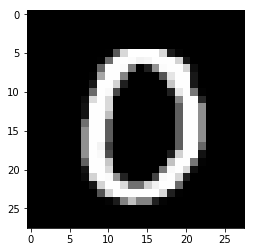

In [3]:
plt.imshow(mnist.train.images[10].reshape(28,28), cmap='gray')

In [4]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32,[None, 10])

W0 = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
B0 = tf.Variable(tf.random_normal([10], stddev=0.01))

W1 = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
B1 = tf.Variable(tf.random_normal([10], stddev=0.01))

h = tf.nn.tanh( tf.matmul(x, W0) + B0 )
y = tf.nn.tanh( tf.matmul(x, W) + B )

#minSquerError 
mse = tf.reduce_mean( tf.square(y - y_) )

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(mse)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [5]:
traintLoss = []
testLoss = []

for i in range(150):
    batchX, batchY = mnist.train.next_batch(1000)
    sess.run(train_step, feed_dict={x:batchX, y_:batchY})
    
    loss1 = sess.run(mse, feed_dict={x:batchX, y_:batchY})
    loss2 = sess.run(mse, feed_dict={x:mnist.test.images, y_:mnist.test.labels})
    
    traintLoss.append(loss1)
    testLoss.append(loss2)
    
print 'Traint finished'

Traint finished


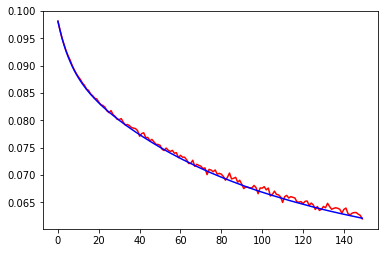

In [6]:
plt.plot(traintLoss,'r')
plt.plot(testLoss,'b')

In [7]:
pred = sess.run(y, feed_dict={x:mnist.test.images, y_: mnist.test.labels})

In [8]:
errors = 0
for i in range (pred.shape[0]):
    if(np.argmax(pred[i])!= np.argmax(mnist.test.labels[i])):
        errors = errors +1
print 'Test Error ' + str(float(errors)/pred.shape[0])

Test Error 0.2066


In [9]:
myW = sess.run(W)

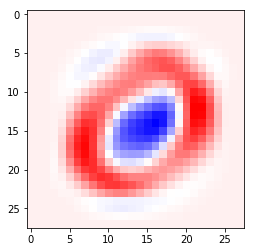

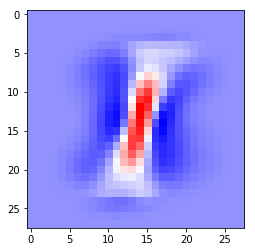

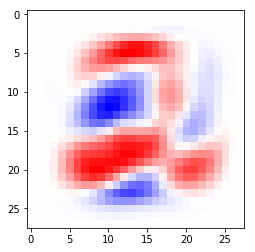

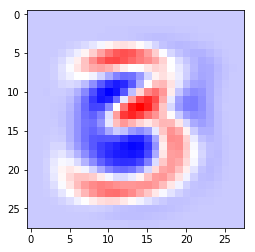

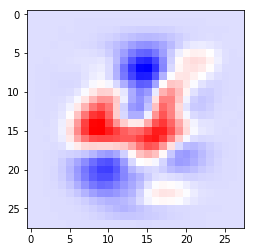

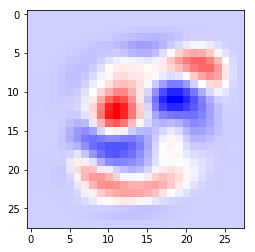

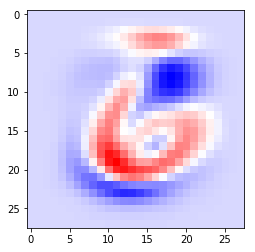

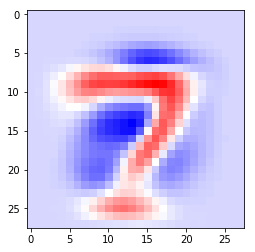

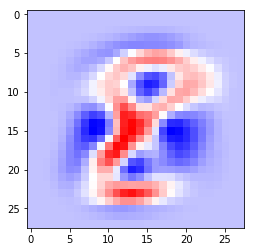

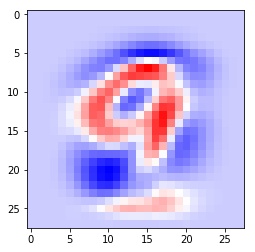

In [12]:
for i in range(10):
    plt.imshow(myW[:,i].reshape(28,28),cmap='bwr')
    plt.show()